In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import seaborn as sbn

In [26]:
plots_destination_path = '../../Results/Preprocessing-Plots/Dataset3/'

In [11]:
df = pd.read_csv("../../data/raw-data/banking.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [13]:
print(f"Raw data shape = {df.shape}")

Raw data shape = (41188, 21)


In [14]:
#Checking for null values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [15]:
target = df['y']
features = df.drop(['y'], axis=1)
print(f"Initial dimensions = {features.shape}")

Initial dimensions = (41188, 20)


In [16]:
print("Unique Values")
for col in features.columns:
    print(f"{col} : {list(features[col].unique())}")

Unique Values
age : [44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32, 49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45, 25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82, 77, 70, 76, 73, 66, 22, 71, 19, 79, 88, 65, 67, 81, 18, 84, 69, 98, 85, 83, 78, 92, 86, 94, 17, 91, 89, 87, 95]
job : ['blue-collar', 'technician', 'management', 'services', 'retired', 'admin.', 'housemaid', 'unemployed', 'entrepreneur', 'self-employed', 'unknown', 'student']
marital : ['married', 'single', 'divorced', 'unknown']
education : ['basic.4y', 'unknown', 'university.degree', 'high.school', 'basic.9y', 'professional.course', 'basic.6y', 'illiterate']
default : ['unknown', 'no', 'yes']
housing : ['yes', 'no', 'unknown']
loan : ['no', 'yes', 'unknown']
contact : ['cellular', 'telephone']
month : ['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep', 'dec']
day_of_week : ['thu', 'fri', 'tue', 'mon', 'wed']
duration : [210, 138, 339, 185, 137, 68, 204, 1

In [17]:
categorical_columns = columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_columns = list(set(features.columns) - set(categorical_columns))
print(categorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'emp_var_rate', 'cons_conf_idx', 'euribor3m', 'pdays', 'nr_employed', 'duration', 'cons_price_idx', 'previous', 'campaign']


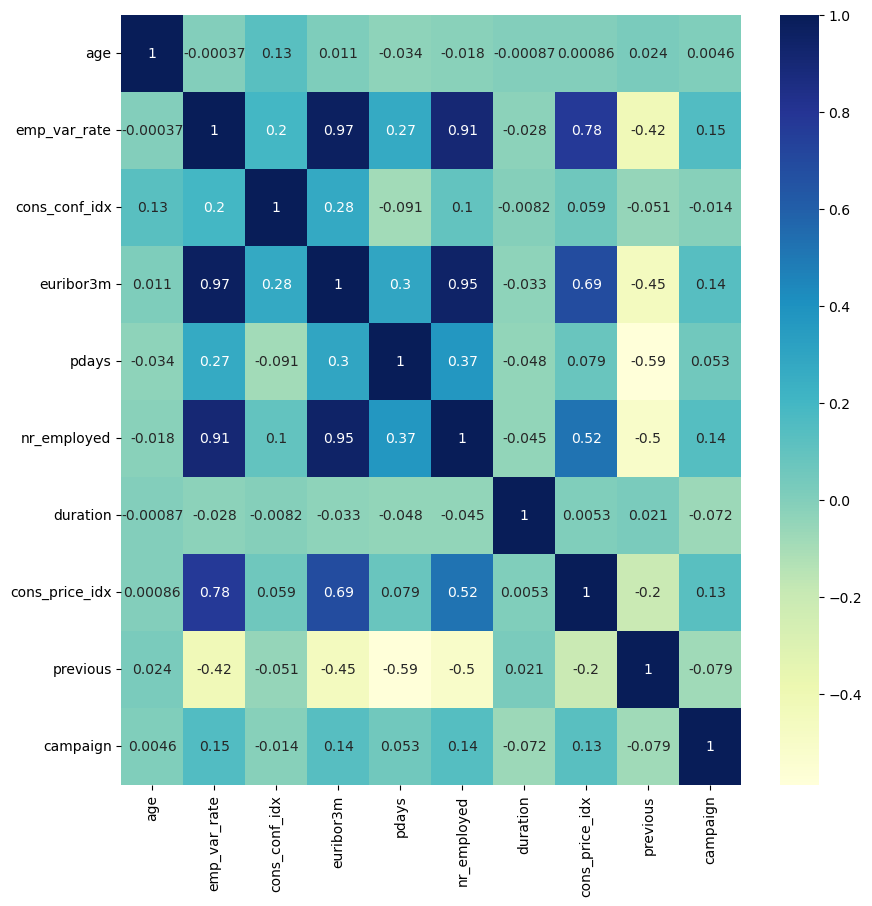

In [18]:
# Correlation Coefficient
plt.figure(figsize = (10, 10))
sbn.heatmap(features[numerical_columns].corr(), cmap="YlGnBu", annot=True)
plt.savefig('../../Results/Preprocessing-Plots/Dataset3/correlation.png', bbox_inches = "tight", facecolor='w')


In [19]:
features.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

In [20]:
# features.drop(['euribor3m'], axis=1, inplace=True)
# numerical_columns.remove('euribor3m')
# plt.figure(figsize = (10, 10))

In [21]:
df_inter = pd.concat([features, target], axis=1)

In [22]:
prev_samples = df_inter.shape[0]
print(f"Before dropping duplicates = {df_inter.shape}")
df_inter.drop_duplicates(keep='last', inplace=True)
print(f"After dropping duplicates = {df_inter.shape}\n No. of duplicates = {prev_samples - df_inter.shape[0]}")

Before dropping duplicates = (41188, 21)
After dropping duplicates = (41176, 21)
 No. of duplicates = 12


In [23]:
df_final = pd.get_dummies(df_inter, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
df_final.shape

(41176, 64)

In [24]:
df_final.dtypes

age                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
                        ...  
day_of_week_tue         uint8
day_of_week_wed         uint8
poutcome_failure        uint8
poutcome_nonexistent    uint8
poutcome_success        uint8
Length: 64, dtype: object

In [21]:
df_final.to_csv('../../data/preprocessed-data/dataset3.csv')

In [25]:
df_inter

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


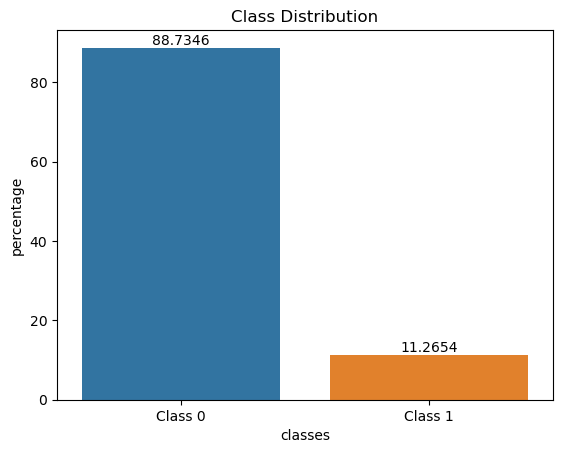

In [27]:
unq, class_dist = np.unique(target, return_counts=True)
class_dist = (class_dist / np.sum(class_dist)) * 100
class_dist_df = pd.DataFrame({'classes' : ['Class 0', 'Class 1'], 'percentage' : class_dist})
ax = sbn.barplot(x='classes', y='percentage', data=class_dist_df)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution')
plt.savefig(plots_destination_path + 'class_distribution')

In [28]:
df_inter.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

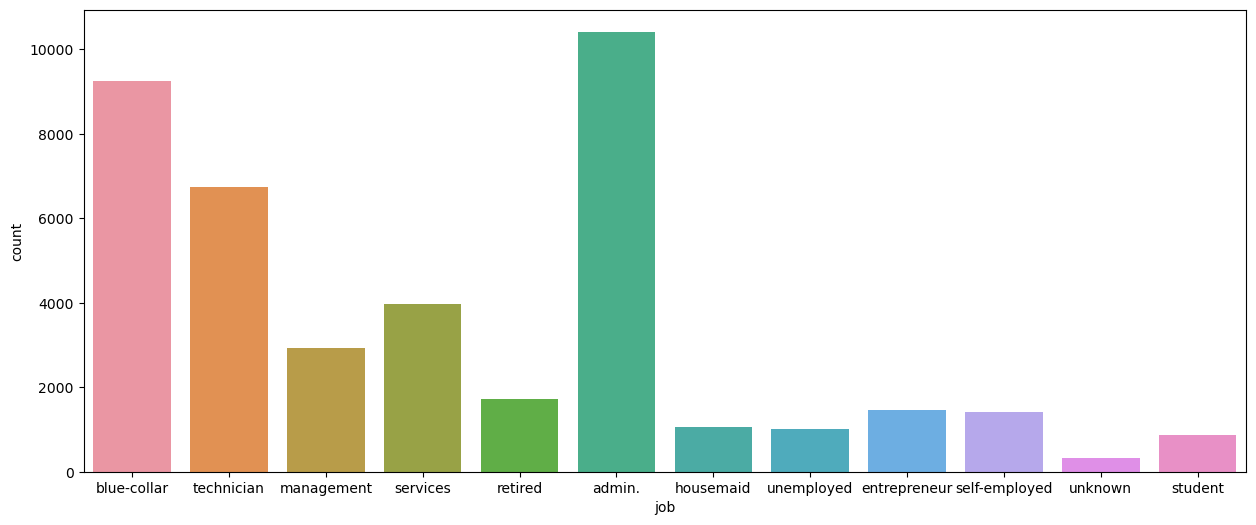

In [36]:
plt.figure(figsize=(15, 6))
sbn.countplot(data=df_inter, x = 'job')
plt.savefig(plots_destination_path + 'job_distribution')

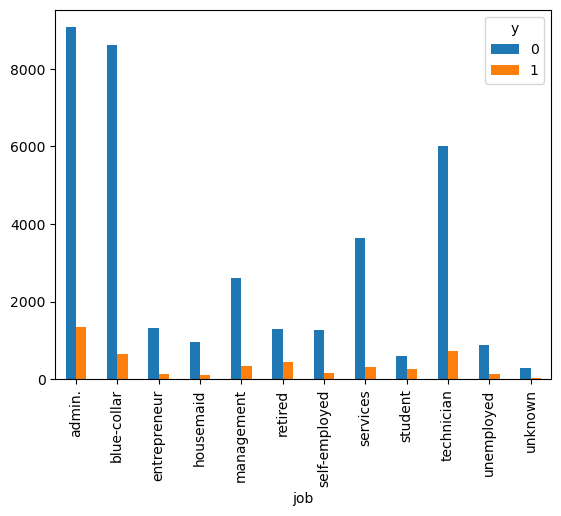

In [35]:
pd.crosstab(df_inter.job,df_inter.y).plot(kind='bar')
plt.savefig(plots_destination_path + 'job-vs-y')

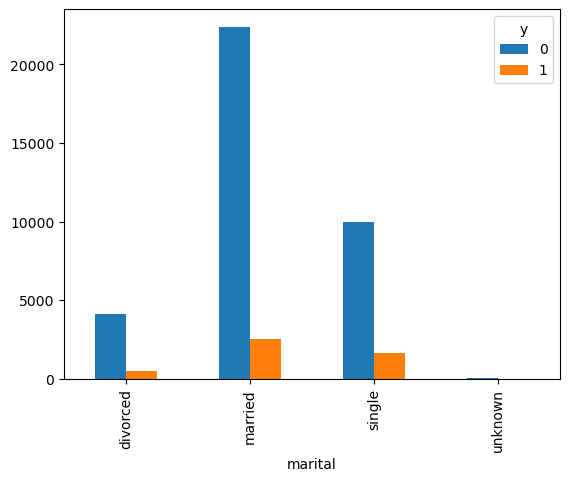

In [37]:
pd.crosstab(df_inter.marital,df_inter.y).plot(kind='bar')
plt.savefig(plots_destination_path + 'marital-vs-y')